# PRODIGY_DS_04

Problem Statement: Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("twitter_sentiment.csv", names=['ID', 'entity', 'sentiment', 'comment'])

In [7]:
df.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### Exploratory data analysis

In [8]:
df.shape

(74682, 4)

In [9]:
# Count of unique entities
df['entity'].value_counts()

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   comment    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### Checking for Duplicates

In [18]:
df[df.duplicated()].count()

ID           2700
entity       2700
sentiment    2700
comment      2340
dtype: int64

In [19]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)

### Checking for Missing values

In [20]:
df.isnull().sum()

ID             0
entity         0
sentiment      0
comment      326
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

ID           0
entity       0
sentiment    0
comment      0
dtype: int64

In [23]:
# Number of unique values in each column
df.nunique()

ID           12447
entity          32
sentiment        4
comment      69491
dtype: int64

## Sentiment Analysis

In [24]:
df['sentiment'].value_counts()

Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: sentiment, dtype: int64

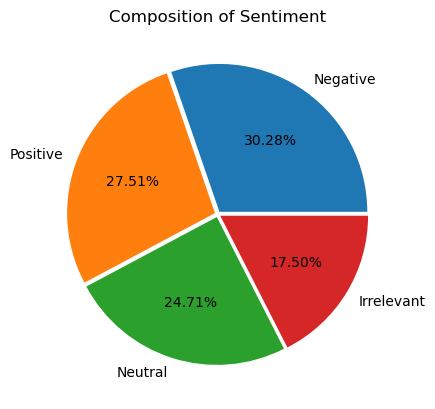

In [27]:
plt.pie(x=df['sentiment'].value_counts().values,
       labels=df['sentiment'].value_counts().index,
       autopct='%.2f%%', explode=[.02, .02, .02, .02])
plt.title("Composition of Sentiment")
plt.show()

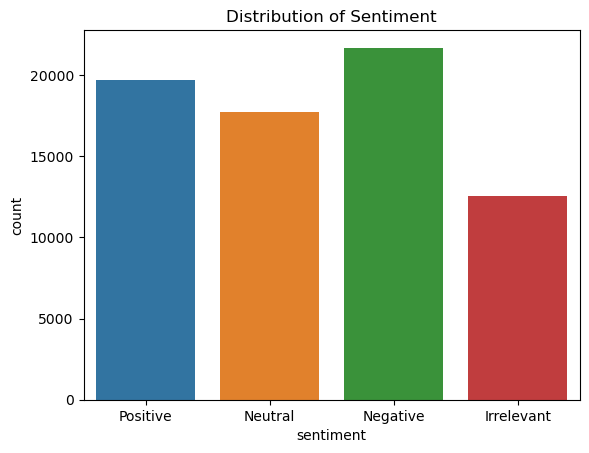

In [28]:
sns.countplot(x='sentiment', data=df)
plt.title("Distribution of Sentiment")
plt.show()

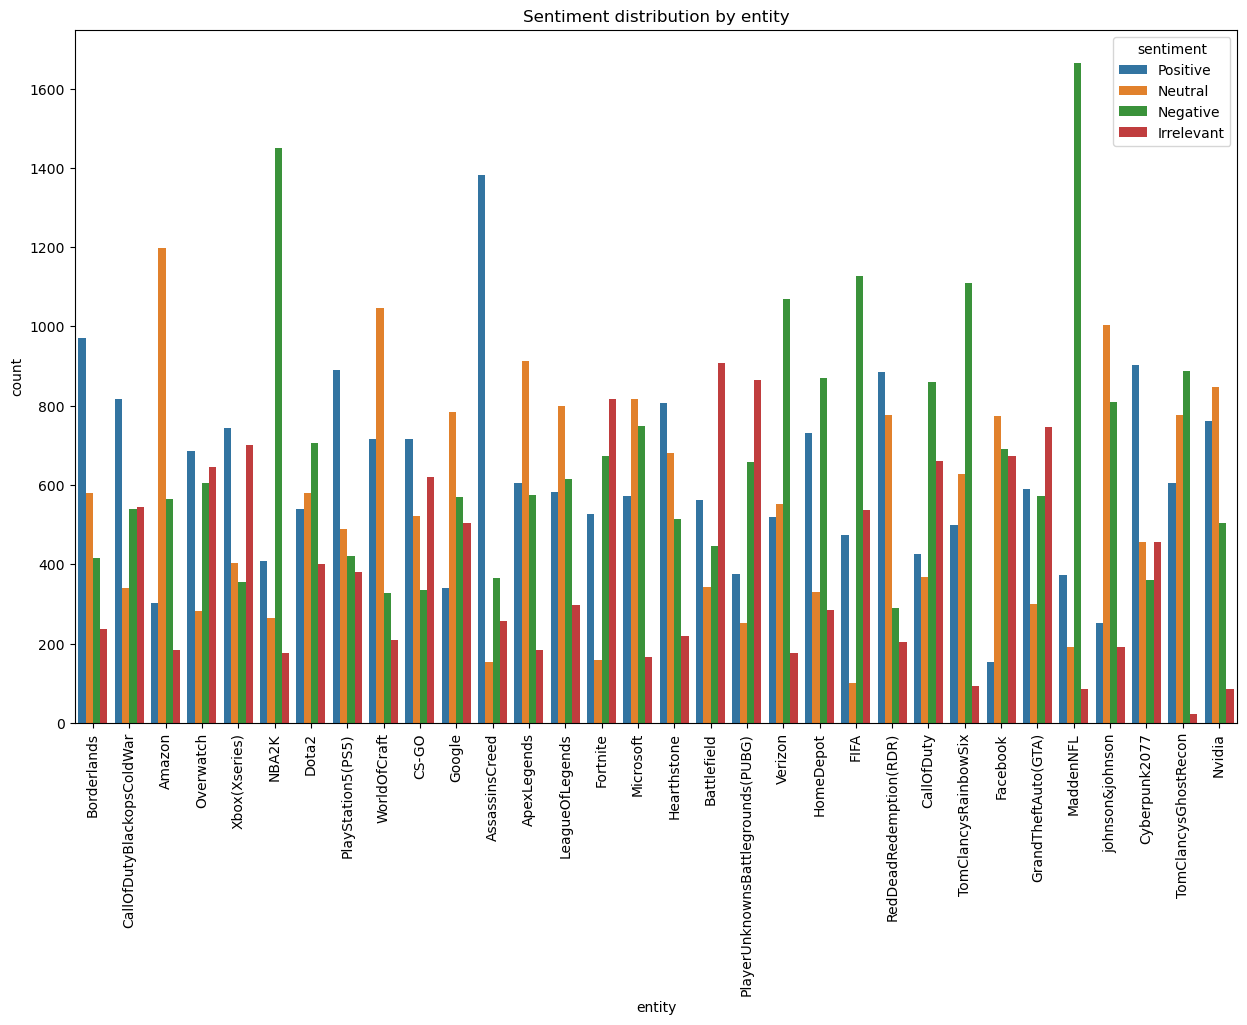

In [44]:
plt.figure(figsize=(15, 9))
sns.countplot(x='entity', hue='sentiment', data=df)
plt.title("Sentiment distribution by entity")
plt.xticks(rotation=90)
plt.show()

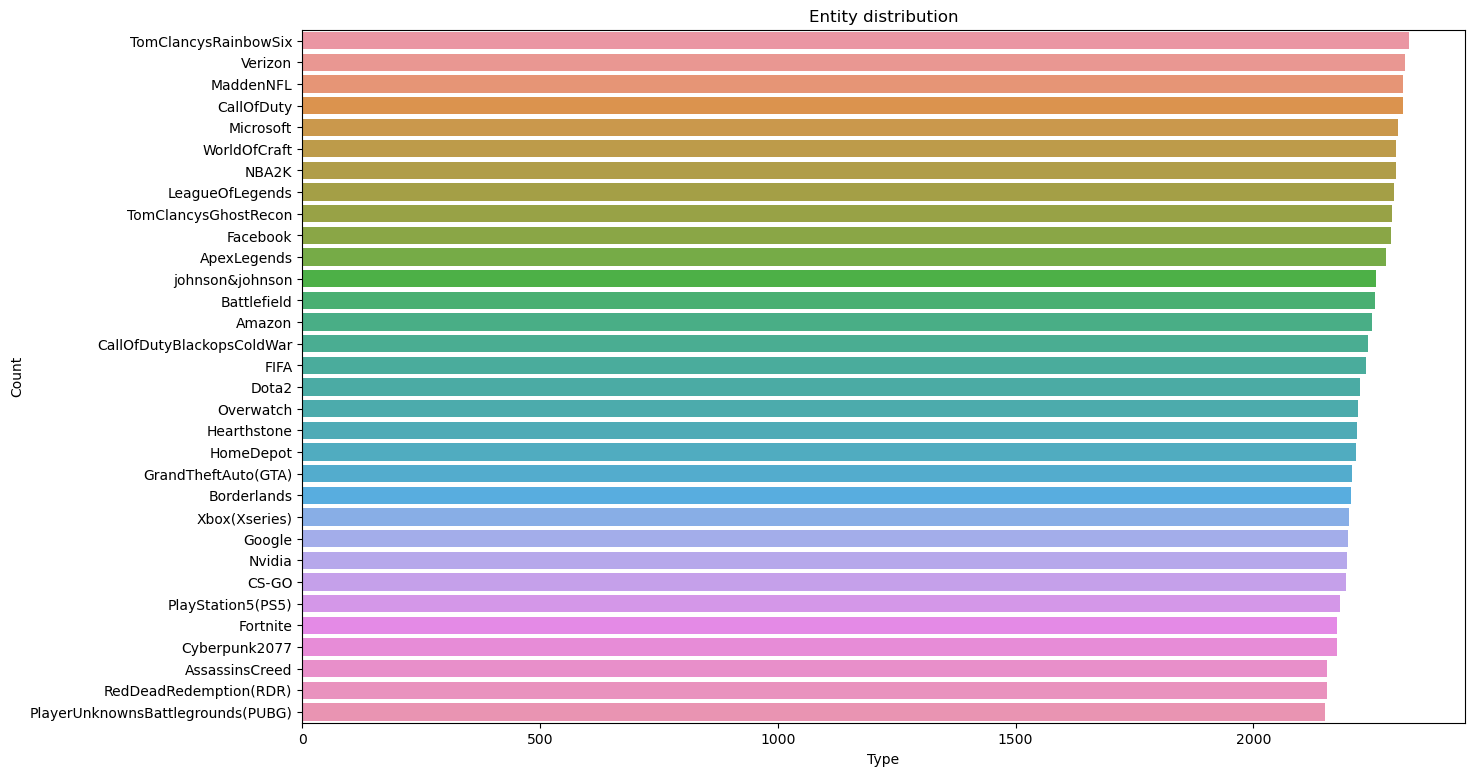

In [46]:
plt.figure(figsize=(15, 9))
sns.barplot(x=df['entity'].value_counts().values,
           y=df['entity'].value_counts().index)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Entity distribution")
plt.show()

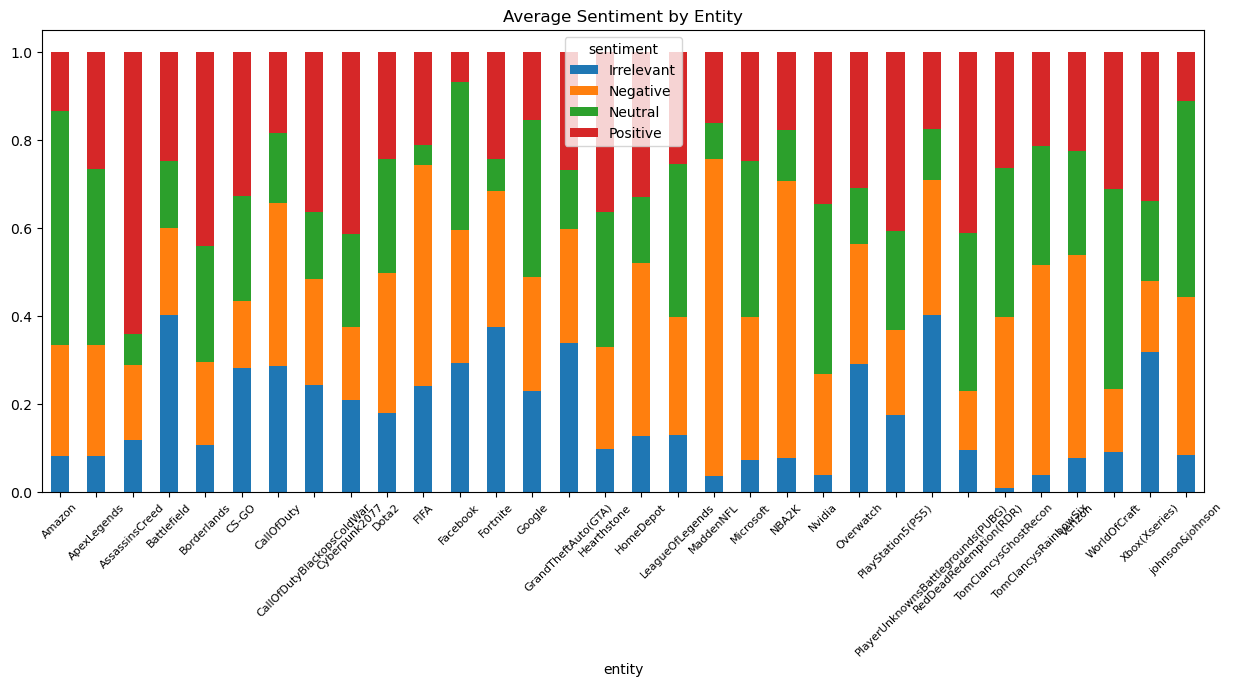

In [58]:
avg_sentiment_by_entity = df.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()
avg_sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title("Average Sentiment by Entity")
plt.xticks(rotation=45, fontsize=8)
plt.show()

## Word Cloud

In [62]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [64]:
df['comment'] = df['comment'].apply(clean)

In [67]:
df.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,im get borderland murder
1,2401,Borderlands,Positive,come border kill
2,2401,Borderlands,Positive,im get borderland kill
3,2401,Borderlands,Positive,im come borderland murder
4,2401,Borderlands,Positive,im get borderland 2 murder


In [70]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(width=800, height=500, min_font_size=10, background_color='white')

### Positive Sentiment Word Cloud

In [71]:
from PIL import Image, ImageDraw, ImageFont

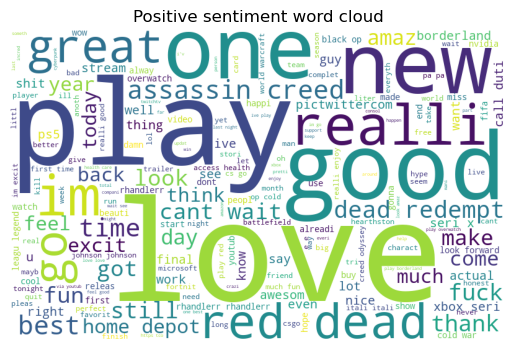

In [72]:
positiveData = df[df['sentiment'] == 'Positive']['comment'].str.cat(sep=" ")

positiveData = positiveData.replace("game", "")
if positiveData:
    wc = WordCloud(width=800, height=500, background_color='white').generate(positiveData)
    plt.title("Positive sentiment word cloud")
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
else:
    print("No data for positive sentiment")

### Negative Sentiment Word Cloud

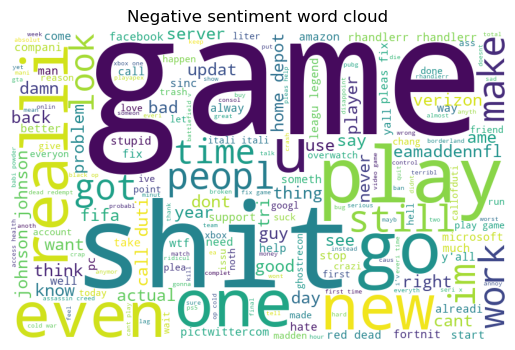

In [80]:
negativeData = df[df['sentiment'] == 'Negative']['comment'].str.cat(sep=" ")
negativeData = negativeData.replace("fuck", "")

if negativeData.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(negativeData)
    plt.title("Negative sentiment word cloud")
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
else:
    print("No data for negative sentiment")

### Neutral Sentiment Word Cloud

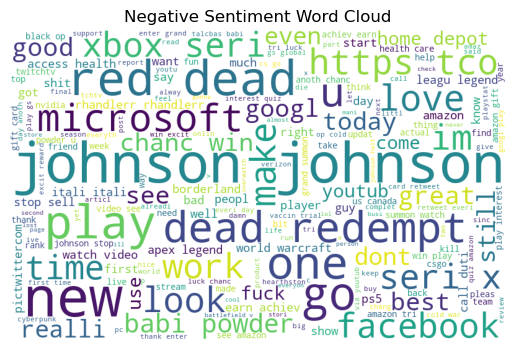

In [76]:
neutral_data = df[df['sentiment'] == 'Neutral']['comment'].str.cat(sep=" ")

neutral_data = neutral_data.replace("game", "")
if neutral_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(neutral_data)
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data for neutral sentiment.")

### Irrelevant Sentiment Word Cloud

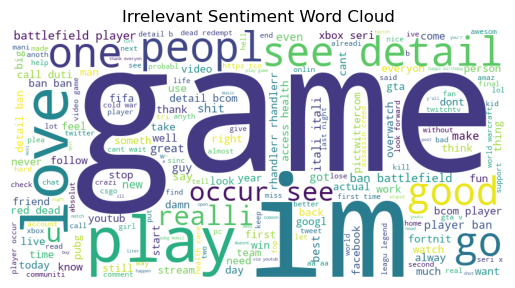

In [82]:
irrelevant_data = df[df['sentiment'] == 'Irrelevant']['comment'].str.cat(sep=" ")
irrelevant_data = irrelevant_data.replace("fuck", "")

if irrelevant_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(irrelevant_data)
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for irrelevant sentiment.")